### Name-Gaurav Kumar
### Reg no-200810083601
### Enrollment no-20/10/MT/021
### Subject-Statistical Inference and Multivariate Techniques
### Assingment 2


<h2 style="color:red">Question</h2><h3 style="color:blue">Choose a dataset from any source on the internet which has several variables and datapoints.<br>
 a) Perform PCA to reduce the number of independent variables<br>
 b) On the dataset with reduced dimension, <br>
    <br>
  &nbsp; i) Perform a scatter plot (in two or three dimensions), and do cluster analysis<br>
   &nbsp;ii) Choose any one variable as dependent and the rest being independent and perform linear regression analysis</h3>

### a) Performing PCA to reduce the number of independent variables
   <p>I am using small data set pizz data set which have 300 rows and 9 columns. Using PCA I will try to reduce into 2 coloums</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('Pizza.csv')
print(df.head(5))
print(df.shape)

  brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2     A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3     A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4     A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67
(300, 9)


In [2]:
br=df['brand']
data=df.drop('brand',axis=1)
print(data.shape)
print(br.shape)

(300, 8)
(300,)


In [3]:
std_d=StandardScaler().fit_transform(data)
print(std_d.shape)

(300, 8)


In [4]:
sample_data=std_d
covar_matrix=np.matmul(sample_data.T,sample_data)
print("the shape of covariance matrix=",covar_matrix.shape)

the shape of covariance matrix= (8, 8)


In [5]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(6,7))

print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(8, 2)
(2, 8)


In [6]:
new_coordinates=np.matmul(vectors,sample_data.T)
print(vectors.shape,"X",sample_data.shape, "=",new_coordinates.shape)

(2, 8) X (300, 8) = (2, 300)


In [7]:
new_co_dints=np.vstack((new_coordinates,br)).T
dataframe=pd.DataFrame(data=new_co_dints,columns=("1st_principle","2nd_principle","Brands"))
print(dataframe.head())

  1st_principle 2nd_principle Brands
0      2.683866      5.029003      A
1      2.533955      5.042441      A
2      2.678397       4.82421      A
3      2.289807      4.488378      A
4      2.163979      4.490815      A


C:\Users\gaura\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


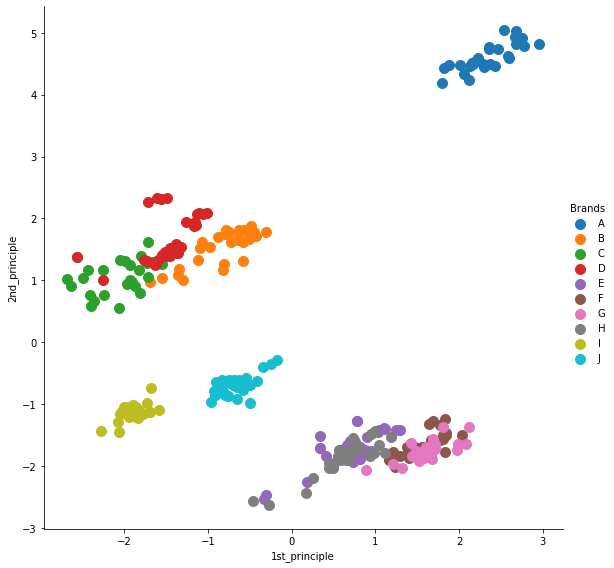

In [8]:
import seaborn as sn
sn.FacetGrid(dataframe,hue="Brands",size=8).map(plt.scatter,"1st_principle","2nd_principle",s=100).add_legend()

<b> In the above section i have perform PCA and reduce the dat set to 300X9 to 300X2 which is 2d data set and perform scatter plot graph</b>
### Now i am going to perform clustring analysis....as our question is 
### Perform a scatter plot (in two or three dimensions), and do cluster analysis
<b> I will do clustting by K MEAN anlaysis .For that i need to find K values whichs suits good on data for that i use elbow method</b>

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


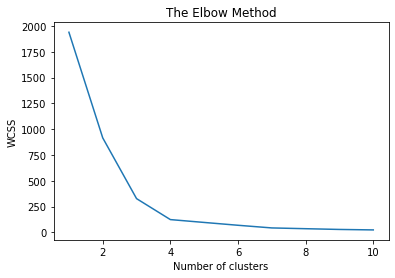

In [9]:

from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X=dataframe.iloc[:,0:2]

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


### As elbow method with minimum deviation is at 4 to 6 . So we take k=4 and perform clusttring

In [11]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\gaura\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fft', 'linalg', 'random', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


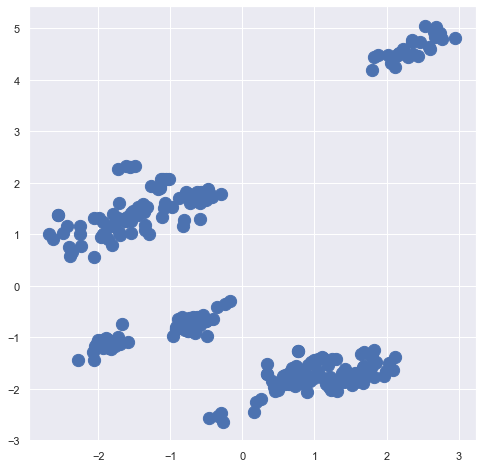

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


plt.figure(figsize=(8, 8))

plt.scatter(dataframe['1st_principle'],dataframe['2nd_principle'],s=150)
#plt.xlim(-180,180)
#plt.ylim(-90,90)
plt.show()


In [13]:
x = dataframe.iloc[:,0:2] 
x

,1st_principle,2nd_principle
0,2.683866,5.029003
1,2.533955,5.042441
2,2.678397,4.82421
3,2.289807,4.488378
4,2.163979,4.490815
...,...,...
295,-0.541854,-0.573447
296,-0.245914,-0.348936
297,-0.526407,-0.68431
298,-0.916013,-0.845646


In [14]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [15]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### data set graph after perfoming clusttring where k=4 sub groups

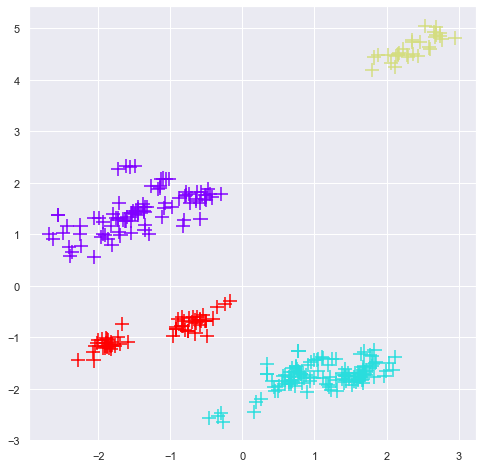

In [16]:
data_with_clusters = dataframe.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.figure(figsize=(8, 8))
plt.scatter(data_with_clusters['1st_principle'],data_with_clusters['2nd_principle'],c=data_with_clusters['Clusters'],s=200,marker='+',cmap='rainbow')

### marker style for club pic code $\clubsuit$

<h2 style="color:red"> ii) Choose any one variable as dependent and the rest being independent and perform linear regression analysis</h2>

### Here I am going to perfoem linear regression on reduced data set .

In [17]:
dataframe

,1st_principle,2nd_principle,Brands
0,2.683866,5.029003,A
1,2.533955,5.042441,A
2,2.678397,4.82421,A
3,2.289807,4.488378,A
4,2.163979,4.490815,A
...,...,...,...
295,-0.541854,-0.573447,J
296,-0.245914,-0.348936,J
297,-0.526407,-0.68431,J
298,-0.916013,-0.845646,J


In [39]:
from sklearn.preprocessing import LabelEncoder
#dataframe['Brands'].value_counts()
label=LabelEncoder()
labels=label.fit_transform(dataframe.Brands)
#labels
dataframe['label_brands']=labels

In [47]:
df1=pd.read_csv('Pizza.csv')
df1.drop(["brand", "id","mois","prot","ash","sodium","carb","cal"], axis = 1, inplace = True)
dataframe['FAT']=df1['fat']
dataframe

,1st_principle,2nd_principle,Brands,Lable_brands,FAT
0,2.683866,5.029003,A,0,44.87
1,2.533955,5.042441,A,0,43.89
2,2.678397,4.82421,A,0,45.78
3,2.289807,4.488378,A,0,43.13
4,2.163979,4.490815,A,0,41.65
...,...,...,...,...,...
295,-0.541854,-0.573447,J,9,17.00
296,-0.245914,-0.348936,J,9,18.46
297,-0.526407,-0.68431,J,9,16.03
298,-0.916013,-0.845646,J,9,15.18


In [20]:
###For data checking
#dataframe.head()
#dataframe.shape
#dataframe.info()

In [21]:
dataframe.isna().sum()

1st_principle    0
2nd_principle    0
Brands           0
FAT              0
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='2nd_principle', ylabel='FAT'>

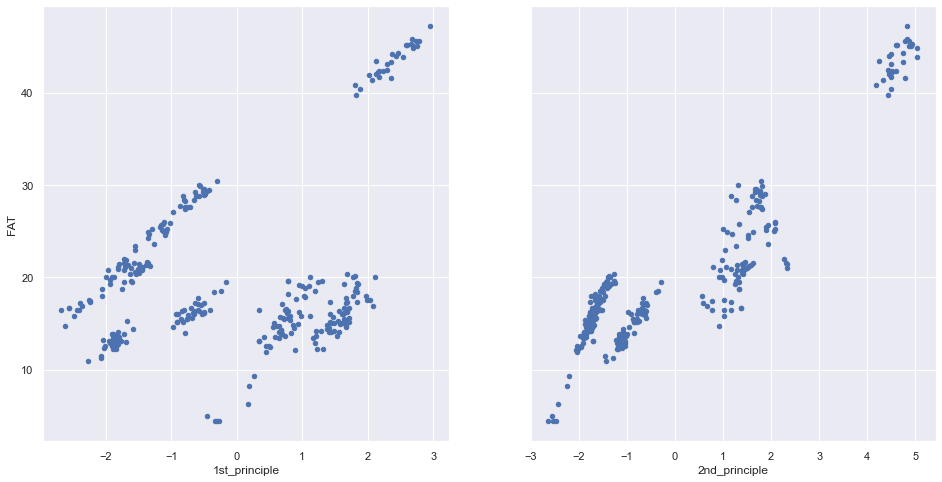

In [50]:
fig, axs = plt.subplots(1, 2, sharey=True)
dataframe.plot(kind='scatter', x='1st_principle', y='FAT', ax=axs[0], figsize=(16, 8))
dataframe.plot(kind='scatter', x='2nd_principle', y='FAT', ax=axs[1])


In [51]:
X=dataframe[['1st_principle']]
y=dataframe['FAT']
y


0      44.87
1      43.89
2      45.78
3      43.13
4      41.65
       ...  
295    17.00
296    18.46
297    16.03
298    15.18
299    15.50
Name: FAT, Length: 300, dtype: float64

In [52]:
# create X and y
feature_cols = ['1st_principle']
#feature_cols2 = ['2nd_principle']
X = dataframe[feature_cols]
y = dataframe['FAT']
#X2=dataframe[feature_cols2]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
#lm.fit(X2,y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

20.229533333333336
[2.09872984]


In [53]:
X_new = pd.DataFrame({'1st_principle': [2.5]})
X_new.head()

,1st_principle
0,2.5


In [54]:
lm.predict(X_new)

array([25.47635794])

In [55]:
X_new = pd.DataFrame({'1st_principle': [dataframe['1st_principle'].min(), dataframe['1st_principle'].max()]})
X_new.head()

,1st_principle
0,-2.677892
1,2.954283


In [56]:
preds = lm.predict(X_new)
preds

array([14.60936178, 26.4297746 ])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


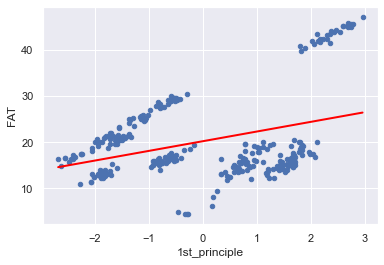

In [57]:

dataframe.plot(kind='scatter', x='1st_principle', y='FAT')
plt.plot(X_new, preds, c='red', linewidth=2)

In [58]:
feature_cols2 = ['2nd_principle']
X = dataframe[feature_cols2]
y = dataframe['FAT']


# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

20.229533333333336
[4.00065438]


In [59]:
X_new = pd.DataFrame({'2nd_principle': [5]})
X_new.head()

,2nd_principle
0,5


In [60]:
lm.predict(X_new)

array([40.23280524])

In [61]:
X_new = pd.DataFrame({'2nd_principle': [dataframe['2nd_principle'].min(), dataframe['2nd_principle'].max()]})
X_new.head()

,2nd_principle
0,-2.632367
1,5.042441


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


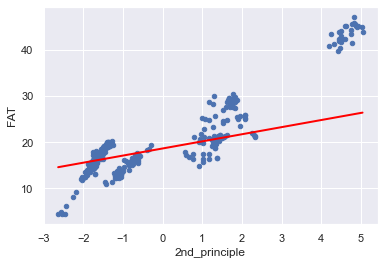

In [62]:
dataframe.plot(kind='scatter', x='2nd_principle', y='FAT')
plt.plot(X_new, preds, c='red', linewidth=2)